<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentiment-Analyzer" data-toc-modified-id="Sentiment-Analyzer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sentiment Analyzer</a></span><ul class="toc-item"><li><span><a href="#Text-Blob-Sentiment-Analyzer" data-toc-modified-id="Text-Blob-Sentiment-Analyzer-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Text Blob Sentiment Analyzer</a></span></li><li><span><a href="#Vader-Sentiment-Analyzer" data-toc-modified-id="Vader-Sentiment-Analyzer-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vader Sentiment Analyzer</a></span></li></ul></li><li><span><a href="#SCIKIT-LEARN" data-toc-modified-id="SCIKIT-LEARN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SCIKIT-LEARN</a></span></li><li><span><a href="#Evaluate-Model-Performance-based-on-TextBlob" data-toc-modified-id="Evaluate-Model-Performance-based-on-TextBlob-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluate Model Performance based on TextBlob</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Evaluate-Model-Performance-based-on-Vader-Sentiment" data-toc-modified-id="Evaluate-Model-Performance-based-on-Vader-Sentiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate Model Performance based on Vader Sentiment</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li></ul></div>

In [1]:
import os
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [3]:
os.chdir(r'C:\Users\User\Sept')
df = pd.read_csv('CCrevised.csv')
df.columns

Index(['Unnamed: 0', 'comments', 'date', 'post_year', 'post_month',
       'post_week_of_the_year', 'post_week_of_the_month', 'post_day',
       'post_day_of_the_week', 'post_time', 'post_time_category',
       'post_caption', 'post_caption_length', 'post_likes_count',
       'post_interactions_count', 'post_decile_rank', 'post_video_view_count',
       'post_is_video', 'world', 'family_type', 'link', 'languages_langdetect',
       'languages_langid', 'languages_seqtolang', 'languages_spacy',
       'languages_polyglot', 'comments_translated', 'languages_langdetect2',
       'languages_langid2', 'languages_seqtolang2', 'languages_spacy2',
       'languages_polyglot2', 'languages_langdetect3', 'languages_langid3',
       'languages_seqtolang3', 'languages_spacy3', 'languages_polyglot3',
       'languages_polyglot4', 'comments_tr3', 'comments_tr'],
      dtype='object')

In [4]:
df[['comments_translated','comments_tr','comments_tr3']][:-10]

,comments_translated,comments_tr,comments_tr3
0,dreambike,dreamlike,dreambike
1,class equipment,class equipment,class equipment
2,show,show,show
3,the perfect weapon,the perfect weapon,the perfect weapon
4,ouiii,iii,iii
...,...,...,...
21183,muratarikn kabasakal_fiko huseyinsenturk sevko...,muratarikn kabasakal_fiko huseyinsenturk sevko...,muratarikn kabasakal_fiko huseyinsenturk seven...
21184,harrybedford_,harrybedford_,harrybedford_
21185,abecelia,bedelia,abecelia
21186,benitolopz,benitolopz,benitolopz


## Sentiment Analyzer

### Text Blob Sentiment Analyzer

In [5]:
from textblob import TextBlob

def TBsentiment(x):
    return TextBlob(x).sentiment
df['TB_sentiment'] = df['comments_tr'].apply(TBsentiment)

In [6]:
df[['comments_tr','TB_sentiment']]

,comments_tr,TB_sentiment
0,dreamlike,"(0.0, 0.0)"
1,class equipment,"(0.0, 0.0)"
2,show,"(0.0, 0.0)"
3,the perfect weapon,"(1.0, 1.0)"
4,iii,"(0.0, 0.0)"
...,...,...
21193,dannyvandendriessche,"(0.0, 0.0)"
21194,"Hello, we share the photos of your crowns xc m...","(0.0, 0.0)"
21195,dualplayaz,"(0.0, 0.0)"
21196,of your gender,"(0.0, 0.0)"


In [7]:
def TBsubjectivity(x):
    return TextBlob(x).subjectivity
df['TB_subjectivity'] = df['comments_tr'].apply(TBsubjectivity)

In [8]:
df[['comments_tr','TB_subjectivity']]

,comments_tr,TB_subjectivity
0,dreamlike,0.0
1,class equipment,0.0
2,show,0.0
3,the perfect weapon,1.0
4,iii,0.0
...,...,...
21193,dannyvandendriessche,0.0
21194,"Hello, we share the photos of your crowns xc m...",0.0
21195,dualplayaz,0.0
21196,of your gender,0.0


In [9]:
#polarity is a value changes between -1 to 1. It shows us how positive or negative the sentence given is.
#subjectivity is another value changes between 0 to 1 which shows us whether the sentence is about a fact or opinion (objective or subjective) (quoted)

In [10]:
def TBpolarity(x):
    return TextBlob(x).polarity
df['TB_polarity'] = df['comments_tr'].apply(TBpolarity)

In [11]:
df[['comments_tr','TB_polarity']]

,comments_tr,TB_polarity
0,dreamlike,0.0
1,class equipment,0.0
2,show,0.0
3,the perfect weapon,1.0
4,iii,0.0
...,...,...
21193,dannyvandendriessche,0.0
21194,"Hello, we share the photos of your crowns xc m...",0.0
21195,dualplayaz,0.0
21196,of your gender,0.0


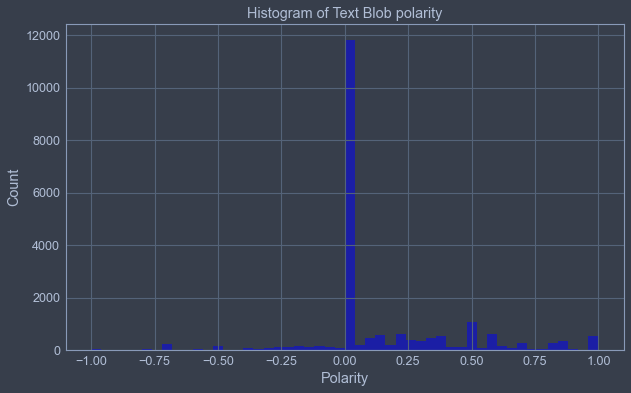

In [12]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.TB_polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Text Blob polarity')
plt.show();

In [13]:
df[df.TB_polarity < 0].head()

,Unnamed: 0,comments,date,post_year,post_month,post_week_of_the_year,post_week_of_the_month,post_day,post_day_of_the_week,post_time,...,languages_langid3,languages_seqtolang3,languages_spacy3,languages_polyglot3,languages_polyglot4,comments_tr3,comments_tr,TB_sentiment,TB_subjectivity,TB_polarity
13,17,if they werent that expensive i would buy one,2020-09-27 19:20:48 Sunday,2020,9,39,4,27,Sun,19:20:48,...,en,en,en,en,en,if they weren that expensive i would buy one,if they werent that expensive i would buy one,"(-0.5, 0.7)",0.700000,-0.500000
16,21,lastima que trae los tan psimos frenos sram,2020-09-27 19:20:48 Sunday,2020,9,39,4,27,Sun,19:20:48,...,en,en,en,en,en,Too bad it brings the very bad rakes dram,Too bad it brings the very bad brakes sram,"(-0.8049999999999998, 0.7666666666666666)",0.766667,-0.805000
30,47,insane the absolute dream,2020-09-27 19:20:48 Sunday,2020,9,39,4,27,Sun,19:20:48,...,en,en,en,en,en,insane the absolute dream,insane the absolute dream,"(-0.4, 0.95)",0.950000,-0.400000
40,17,sick,2020-08-31 16:26:39 Monday,2020,8,36,4,31,Mon,16:26:39,...,en,en,unknown,en,en,sick,sick,"(-0.7142857142857143, 0.8571428571428571)",0.857143,-0.714286
41,18,sick,2020-08-31 16:26:39 Monday,2020,8,36,4,31,Mon,16:26:39,...,en,en,unknown,en,en,sick,sick,"(-0.7142857142857143, 0.8571428571428571)",0.857143,-0.714286


In [14]:
len(df[df.TB_polarity < 0].head())

5

In [15]:
df[df.TB_polarity == 1].head()

,Unnamed: 0,comments,date,post_year,post_month,post_week_of_the_year,post_week_of_the_month,post_day,post_day_of_the_week,post_time,...,languages_langid3,languages_seqtolang3,languages_spacy3,languages_polyglot3,languages_polyglot4,comments_tr3,comments_tr,TB_sentiment,TB_subjectivity,TB_polarity
3,5,the perfect weapon,2020-09-27 19:20:48 Sunday,2020,9,39,4,27,Sun,19:20:48,...,en,en,en,en,en,the perfect weapon,the perfect weapon,"(1.0, 1.0)",1.0,1.0
35,7,marvelous bike,2020-08-31 16:26:39 Monday,2020,8,36,4,31,Mon,16:26:39,...,et,de,en,en,en,marvelous bike,marvelous bike,"(1.0, 1.0)",1.0,1.0
59,9,forest of dean wales best bike ever,2019-09-15 17:11:38 Sunday,2019,9,37,2,15,Sun,17:11:38,...,en,de,en,en,en,forest of dean wales best bike ever,forest of dean wales best bike ever,"(1.0, 0.3)",0.3,1.0
63,14,best bike out there,2019-09-15 17:11:38 Sunday,2019,9,37,2,15,Sun,17:11:38,...,en,en,en,en,en,best bike out there,best bike out there,"(1.0, 0.3)",0.3,1.0
65,17,oaxaca some of the best trails in mexico,2019-09-15 17:11:38 Sunday,2019,9,37,2,15,Sun,17:11:38,...,en,en,en,en,en,oaxaca some of the best trails in mexico,oaxaca some of the best trails in mexico,"(1.0, 0.3)",0.3,1.0


In [16]:
len(df[df.TB_polarity == 1])

531

In [17]:
# Define a function to classify polarities
def analyse_polarity(TB_polarity):
    if TB_polarity > 0:
        return "Positive"
    if TB_polarity == 0:
        return "Neutral"
    if TB_polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
df["TB_Polarity_Label"] = df["TB_polarity"].apply(analyse_polarity)

In [18]:
# Print the value counts of the Label column
print(df["TB_Polarity_Label"].value_counts())

Neutral     11767
Positive     7709
Negative     1722
Name: TB_Polarity_Label, dtype: int64


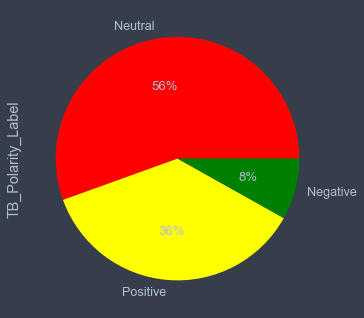

In [19]:
df.TB_Polarity_Label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

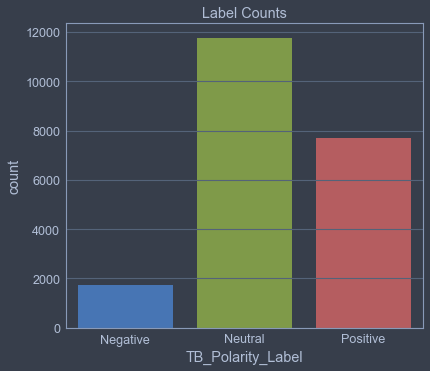

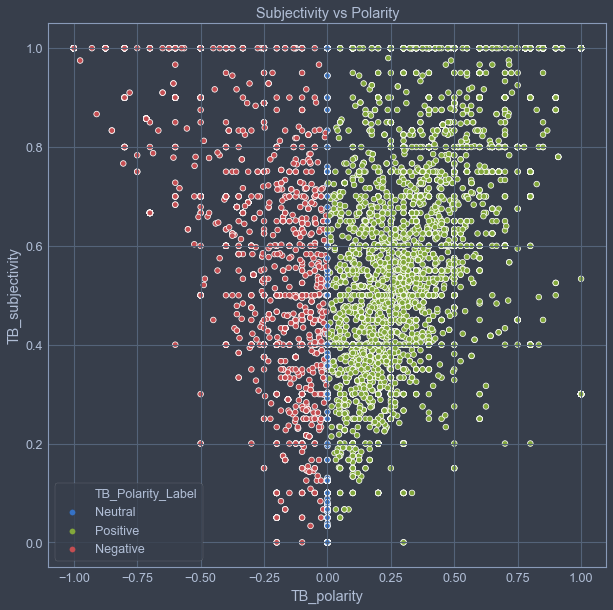

In [19]:
import seaborn as sns
# Change the datatype as "category"
df["TB_Polarity_Label"] = df["TB_Polarity_Label"].astype("category")
# Visualize the Label counts
sns.countplot(df["TB_Polarity_Label"])
plt.title("Label Counts")
plt.show()
# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="TB_polarity", y="TB_subjectivity", hue="TB_Polarity_Label", data=df)
plt.title("Subjectivity vs Polarity")
plt.show()

Positive 

family_type
Spectral           815
Ultimate           783
Strive             761
Grail              760
Sender             630
Speedmax           499
Aeroad             493
Neuron             401
Lux                357
Inflite            354
Torque             340
Exceed             299
Endurace           285
Spectral:ON        257
Stitched           151
Dude                95
Grail:ON            85
Endurace:ON         56
Urban               52
Neuron:ON           48
Roadlite            32
Precede:ON          31
Commuter            24
Commuter:ON         20
Grand Canyon:ON     20
Grand Canyon        17
Pathlite:ON         17
Roadlite:ON         15
Pathlite            12
Name: family_type, dtype: int64

Negative

family_type
Grail              230
Spectral           176
Strive             171
Sender             169
Ultimate           153
Speedmax           108
Neuron              94
Aeroad              88
Exceed              76
Torque              68
Spectral:ON         60
Lu

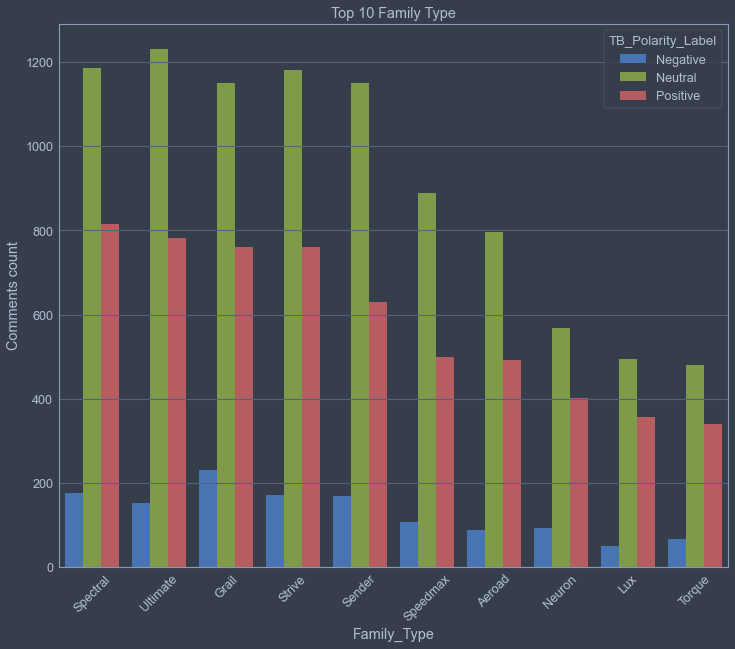

In [20]:
# Get the positive/negative counts by bike family
positives_by_bike_family = df[df.family_type!='unknown'].groupby(
    "TB_Polarity_Label")["family_type"].value_counts().Positive.sort_values(ascending=False)
negatives_by_bike_family =df[df.family_type!='unknown'].groupby(
    "TB_Polarity_Label")["family_type"].value_counts().Negative.sort_values(ascending=False)

#Family_Type = df[df.Family_Type!='unknown']
# Select the top 20 family types based on the number of comments
top_family_type = df["family_type"].value_counts(sort=True).head(20)

# Print them out
print("Positive \n")
print(positives_by_bike_family)
print("\nNegative\n")
print(negatives_by_bike_family)

# Create a mask for top family type (by number of comments)
mask = df["family_type"].isin(top_family_type.index[:10]).values

# Create a new DataFrame only includes top10 country
top_10df = df.iloc[mask,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="family_type", hue="TB_Polarity_Label", data=top_10df, 
              order=top_10df["family_type"].value_counts().index)
plt.xlabel("Family_Type")
locs, labels = plt.xticks()
#plt.xticks(locs, Family_Type[:10])
plt.xticks(rotation=45)
plt.ylabel("Comments count")
plt.title("Top 10 Family Type")
plt.show()

Positive 

family_type
Spectral           815
Ultimate           783
Strive             761
Grail              760
Sender             630
Speedmax           499
Aeroad             493
Neuron             401
Lux                357
Inflite            354
Torque             340
Exceed             299
Endurace           285
Spectral:ON        257
Stitched           151
Dude                95
Grail:ON            85
Endurace:ON         56
Urban               52
Neuron:ON           48
Roadlite            32
Precede:ON          31
Commuter            24
Commuter:ON         20
Grand Canyon:ON     20
Grand Canyon        17
Pathlite:ON         17
Roadlite:ON         15
Pathlite            12
Name: family_type, dtype: int64

Negative

family_type
Grail              230
Spectral           176
Strive             171
Sender             169
Ultimate           153
Speedmax           108
Neuron              94
Aeroad              88
Exceed              76
Torque              68
Spectral:ON         60
Lu

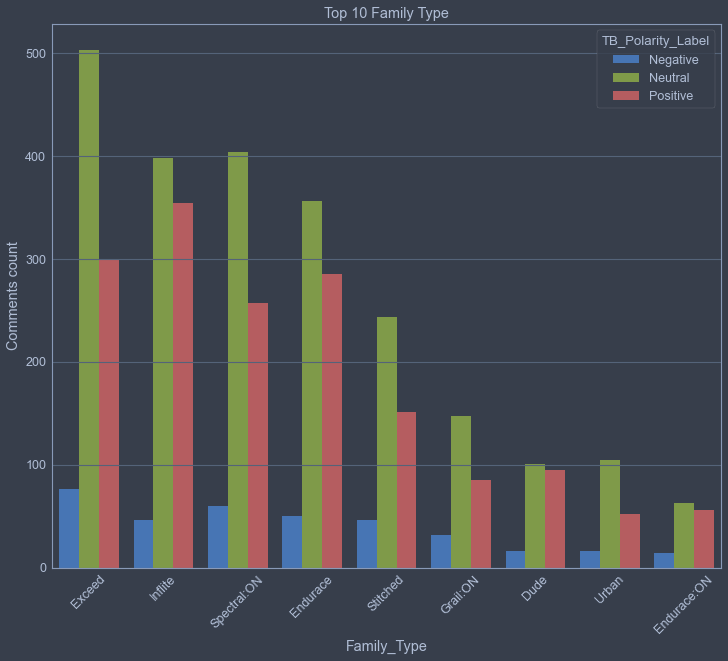

In [21]:
# Get the positive/negative counts by bike family
positives_by_bike_family = df[df.family_type!='unknown'].groupby(
    "TB_Polarity_Label")["family_type"].value_counts().Positive.sort_values(ascending=False)
negatives_by_bike_family =df[df.family_type!='unknown'].groupby(
    "TB_Polarity_Label")["family_type"].value_counts().Negative.sort_values(ascending=False)

#Family_Type = df[df.Family_Type!='unknown']
# Select the top 20 family types based on the number of comments
top_family_type = df["family_type"].value_counts(sort=True).head(20)

# Print them out
print("Positive \n")
print(positives_by_bike_family)
print("\nNegative\n")
print(negatives_by_bike_family)

# Create a mask for top family type (by number of comments)
mask2 = df["family_type"].isin(top_family_type.index[10:19]).values

# Create a new DataFrame only includes top10 country
eleven_20df = df.iloc[mask2,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="family_type", hue="TB_Polarity_Label", data=eleven_20df, 
              order=eleven_20df["family_type"].value_counts().index)
plt.xlabel("Family_Type")
locs, labels = plt.xticks()
#plt.xticks(locs, Family_Type[:10])
plt.xticks(rotation=45)
plt.ylabel("Comments count")
plt.title("Top 10 Family Type")
plt.show()

### Vader Sentiment Analyzer

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['Vader_sentiment'] = df['comments_tr'].apply(lambda comments_tr: 
                                                        analyzer.polarity_scores(comments_tr))
df['Vader_positive']  = df['Vader_sentiment'].apply(lambda score_dict: score_dict['pos'])
df['Vader_negative']  = df['Vader_sentiment'].apply(lambda score_dict: score_dict['neg'])
df['Vader_neutral']  = df['Vader_sentiment'].apply(lambda score_dict: score_dict['neu'])
df['Vader_compound']  = df['Vader_sentiment'].apply(lambda score_dict: score_dict['compound'])

In [21]:
df[['TB_polarity','Vader_compound']]

,TB_polarity,Vader_compound
0,0.0,0.0000
1,0.0,0.0000
2,0.0,0.0000
3,1.0,0.3612
4,0.0,0.0000
...,...,...
21193,0.0,0.0000
21194,0.0,0.2960
21195,0.0,0.0000
21196,0.0,0.0000


In [22]:
len(df[df['Vader_compound']<0])

2030

In [23]:
# Define a function to classify polarities
def analyse_polarityVader(Vader_compound):
    if Vader_compound > 0:
        return "Positive"
    if Vader_compound == 0:
        return "Neutral"
    if Vader_compound < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
df["Vader_Polarity_Label"] = df["Vader_compound"].apply(analyse_polarityVader)

In [24]:
# Print the value counts of the Label column
print(df["Vader_Polarity_Label"].value_counts())

Neutral     10855
Positive     8313
Negative     2030
Name: Vader_Polarity_Label, dtype: int64


Check the polarity distribution of the overall comments

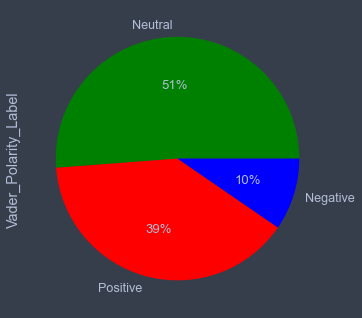

In [37]:
df.Vader_Polarity_Label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "red", "blue"])

Visualize Polarity by Family Type

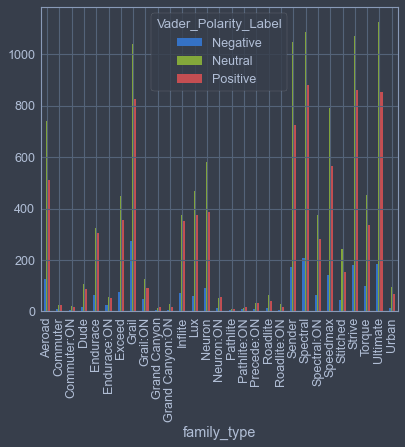

In [39]:
bike_sentiment = df.groupby([
    'family_type', 'Vader_Polarity_Label']).Vader_Polarity_Label.count().unstack()
bike_sentiment.plot(kind='bar')

Positive 

family_type
Spectral           880
Strive             861
Ultimate           854
Grail              825
Sender             727
Speedmax           564
Aeroad             512
Neuron             387
Lux                375
Exceed             354
Inflite            350
Torque             336
Endurace           306
Spectral:ON        281
Stitched           153
Grail:ON            92
Dude                88
Urban               66
Neuron:ON           55
Endurace:ON         54
Roadlite            40
Precede:ON          31
Commuter            24
Pathlite:ON         19
Grand Canyon        18
Commuter:ON         17
Grand Canyon:ON     17
Roadlite:ON         16
Pathlite            11
Name: family_type, dtype: int64

Negative

family_type
Grail              274
Spectral           208
Ultimate           184
Strive             179
Sender             174
Speedmax           140
Aeroad             127
Torque              99
Neuron              92
Exceed              76
Inflite             71
Sp

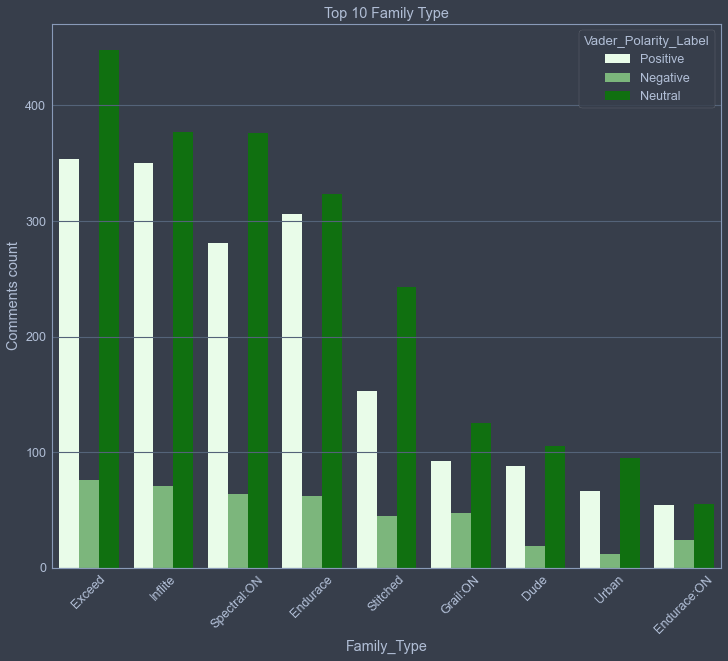

In [54]:
# Get the positive/negative counts by bike family
positives_by_bike_family = df[df.family_type!='unknown'].groupby(
    "Vader_Polarity_Label")["family_type"].value_counts().Positive.sort_values(ascending=False)
negatives_by_bike_family =df[df.family_type!='unknown'].groupby(
    "Vader_Polarity_Label")["family_type"].value_counts().Negative.sort_values(ascending=False)

#Family_Type = df[df.Family_Type!='unknown']
# Select the top 20 family types based on the number of comments
top_family_type = df["family_type"].value_counts(sort=True).head(20)

# Print them out
print("Positive \n")
print(positives_by_bike_family)
print("\nNegative\n")
print(negatives_by_bike_family)

# Create a mask for top family type (by number of comments)
mask2 = df["family_type"].isin(top_family_type.index[10:19]).values

# Create a new DataFrame only includes top10 country
eleven_20df = df.iloc[mask2,:]
color=['red','green','blue']
# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="family_type", color='green',hue="Vader_Polarity_Label", data=eleven_20df,
              order=eleven_20df["family_type"].value_counts().index)

plt.xlabel("Family_Type")
locs, labels = plt.xticks()
#plt.xticks(locs, Family_Type[:10])
plt.xticks(rotation=45)
plt.ylabel("Comments count")
plt.title("Top 10 Family Type")
plt.show()

## SCIKIT-LEARN

In [29]:
#df = pd.read_csv('CCdetect.csv')

In [30]:
# Cleaning the texts
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 21198):
    review = re.sub('[^a-zA-Z]', ' ', df['comments_tr'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
#corpus = df['comments_tr']

## Evaluate Model Performance based on TextBlob 

In [31]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = df['TB_Polarity_Label']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Naive Bayes

In [32]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Naive Bayes accuracy: ',accuracy_score(y_test,y_pred))

Naive Bayes accuracy:  0.2959905660377358


### Logistic Regression

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train,y=y_train)

#Predicting the Test set results
y_pred = log_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Logistic Regression accuracy: ',accuracy_score(y_test,y_pred))

Logistic Regression accuracy:  0.9209905660377359


In [36]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9074626857241648, 0.8336840254033272, 0.8634455247608807, None)

In [37]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9209905660377359, 0.9209905660377359, 0.9209905660377359, None)

In [38]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9203830227874902, 0.9209905660377359, 0.9183668416340515, None)

In [39]:
# Cleaning the texts
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 21198):
    review = re.sub('[^a-zA-Z]', ' ', df['comments_tr'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
#corpus = df['comments_tr']

In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = df['TB_Polarity_Label']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Evaluate Model Performance based on Vader Sentiment

In [41]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = df['Vader_Polarity_Label']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Naive Bayes

In [42]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [43]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Naive Bayes accuracy: ',accuracy_score(y_test,y_pred))

Naive Bayes accuracy:  0.27523584905660375


### Logistic Regression

In [44]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train,y=y_train)

#Predicting the Test set results
y_pred = log_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Logistic Regression accuracy: ',accuracy_score(y_test,y_pred))

Logistic Regression accuracy:  0.9158018867924528


In [46]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9033414937937551, 0.8131614889669602, 0.8444398667406071, None)

In [47]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9158018867924528, 0.9158018867924528, 0.9158018867924528, None)

In [48]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9144230161450698, 0.9158018867924528, 0.9102978785593103, None)

In the case of sentiment analysis, being able to correctly predict positive on positive and negative on negative is better than only focusing on correctly predicting positive labels. Thus, precision is a more valued metric here.

Comparing TextBlob and Vader Sentiment Analyzer, the model performs better with TextBlob Sentiment Analyzer.

In [51]:
df.to_excel('CCsentiment.xlsx')